In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import latexify as lt

In [5]:
lt.latexify()

In [3]:
'''
df1 = pd.read_csv('../all-delhi-tweets-2016.csv')
df2 = pd.read_csv('../all-delhi-tweets-2017.csv')
df3 = pd.read_csv('../all-delhi-tweets-2018.csv')
df4 = pd.read_csv('../all-delhi-tweets-2019.csv')
df1 = df1.append([df2,df3,df4])
usernameCount = df1['username'].value_counts()
usernameCount = usernameCount.reset_index()
data = usernameCount.drop('index', axis=1)
#data.to_csv('numberOfusers.csv')
'''

/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data = pd.read_csv('numberOfusers.csv')
data['username'] = data['username']/sum(data['username'])
data = data.drop(['Unnamed: 0'], axis=1)

In [7]:
#data = data.drop(['Unnamed: 0'], axis=1)

In [8]:
data

,username
0,0.086822
1,0.028791
2,0.020000
3,0.019903
4,0.007932
...,...
177519,0.000001
177520,0.000001
177521,0.000001
177522,0.000001


In [9]:
# value of alpha to be taken from powerlaw library below
def mypowerlaw(x,a,alpha):
    return a*(x**(-alpha))
inputx = np.linspace(0,50,50)
outputx = mypowerlaw(inputx,0.1,1.8)
datax = pd.DataFrame(outputx)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


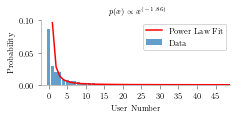

In [24]:
lt.latexify(fig_height=1.2)
ax = data[0:50].plot.bar(width=0.9, alpha=0.7)
ax.set_xlim(-2)
#ax.legend('s')
#ax.set_xticks(np.arange(0, 99+1, 5.0))
#plt.xticks(np.arange(0, 49+1, 1.86))
ax2 = datax.plot(ax=ax, color='r', linewidth=1.5)
ax2.set_xlim(-2)
ax2.legend(['Power Law Fit','Data'])
ax2.set_title("$p(x) \propto x^{(-1.86)}$", fontsize=8)
ax2.set_ylabel('Probability', fontsize=8)
ax2.set_xlabel('User Number',fontsize=8)
ax2.set_xticks([i for i in range(0,50,5)])
ax2.set_xticklabels([i for i in range(0,50,5)])
lt.format_axes(ax2)
plt.savefig('power-law.pdf', bbox_inches='tight')

In [198]:
import powerlaw
results = powerlaw.Fit(list(data['username'][:30]))
print(results.power_law.alpha)
print(results.power_law.sigma)
print(results.xmin)

1.8697699162075123
0.18135956444248047
0.0011954692383725589


Calculating best minimal value for power law fit
/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [25]:
#comparing powerlaw with exponential
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(R)
print(p)

4.440372532371688
8.980328439752075e-06


In [26]:
#comparing power law with lognormal
R1, p1 = results.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print(R1)
print(p1)

-0.8227452841144967
0.4106528577636016


Text(0.5, 1.0, 'PDF Plot')

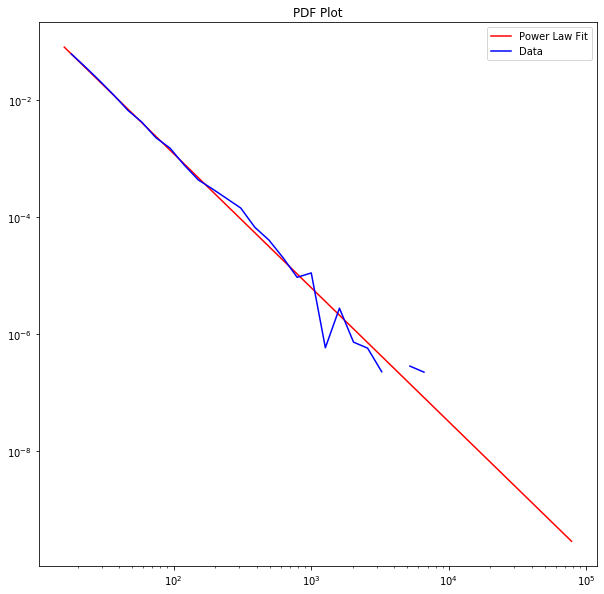

In [13]:
plt.figure(figsize=(10,10))
ax = results.power_law.plot_pdf(label='Power Law Fit', color='r')
results.plot_pdf(label='Data', color='b')
ax.legend()
plt.title("PDF Plot")

## It has been long. Lets do some fresh analysis


In [41]:
import pandas
import numpy as np

In [42]:
data = pd.read_csv('numberOfusers.csv')
data['username'] = data['username']/sum(data['username'])
data = data.drop(['Unnamed: 0'], axis=1)

In [47]:
data = data.iloc[:,0]

In [49]:
import powerlaw
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(5412.886374318775, 8.982625169570391e-06)

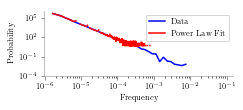

In [57]:

####
figPDF = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)
####
figPDF.set_ylabel("Probability")
figPDF.set_xlabel(r"Frequency")
figPDF.legend(['Data','Power Law Fit'])
lt.format_axes(figPDF)
figname = 'power-law-pdf'
plt.savefig(figname+'.pdf', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)